<a href="https://colab.research.google.com/github/gabriela-148/IDS/blob/main/HW4/Problem2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gabriella Huegel**

**Project 4 Report**


**CSC346**


**10/26/23**
# Problem 2 - Python

For this problem, I used Google Colab to execute all the Python code. To start, I imported the necessary libraries to cleanse and examine the dataset.

I read the CSV file using the pandas library and I created a dataframe from the CSV called nutritionDF.


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

# Reading CSV to dataframe
nutritionDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv");

# Print out dataframe
nutritionDF

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


Normally, this would be the step where I would cleanse the data and identify outliers. In this case, I do not believe cleansing the data would be helpful. This is because the data related to food items. In order for this data to be accurate, it cannot be cleansed because that would mean I am giving out inaccurate information or data analysis that could have negative repercussions on those who use this analysis.

Next, I displayed the food items with the highest amount of saturated fat.

In [ ]:
#Top 5 saturated fat
nutritionDF = nutritionDF.sort_values(by='saturated_fat', ascending = False)

nutritionDF.head(5)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


From this list, we can see that Cheesecake has the highest amount of saturated fat.

Then, I calculated the amount of saturated fat per gram of food per item. This data is important because the amount of saturated fat per gram may be different than the total amount in a certain food.

In [ ]:
# Create a new variable "saturated_fat_per_gram"
nutritionDF['saturated_fat_per_gram'] = nutritionDF['saturated_fat'] / nutritionDF['weight_in_grams']

# Sort the DataFrame by "saturated_fat_per_gram" in descending order
nutritionDF = nutritionDF.sort_values(by='saturated_fat_per_gram', ascending=False)

# Get the top five food items with the highest saturated fat per gram
nutritionDF.head(5)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
912,BUTTER; SALTED 1 PAT,5.0,2.5,11,0.500000


I displayed the top five foods with the highest saturated fat per gram, and this list is different than the total amount of saturated fat. In this list, butter takes the cake with the highest amount fat per gram. This did not surprise me as butter is all saturated fat.

Next, I scaled the saturated fat per gram attribute so I could identify outliers. I used the StandardScaler to create a normal distribution. After scaling, I could apply the 3 standard deviation rule which states that any values outside 3 or -3 are outliers. I used that logic here. Then, I created a density plot for the outliers of the dataset.

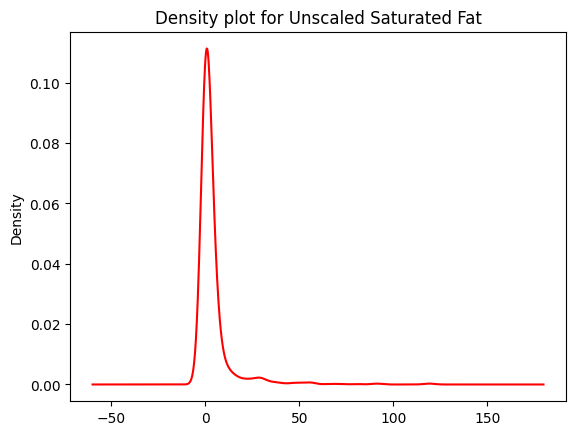

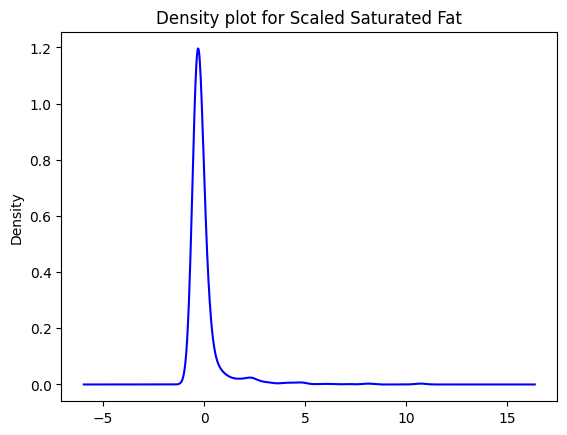

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the column to calculate z-scores
nutritionDF['scaled_saturated'] = scaler.fit_transform(nutritionDF[['saturated_fat']])

nutritionOutliers = nutritionDF.query('(scaled_saturated > 3 | scaled_saturated < -3)')['scaled_saturated']

nutritionOutliers.count()

nutritionDF.saturated_fat.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated Fat')
plt.show()


nutritionDF.scaled_saturated.plot.density(color="blue")
plt.title('Density plot for Scaled Saturated Fat')
plt.show()

Next, I checked to see if there are any missing values. When I examined the data I noticed that there were many 0 values. Normally, I would impute the average of each column. However, since we are dealing with food items, in this case we do have to impute any values because not all foods with contain cholesterol or saturated fat. So no values need to be imputed.

In [ ]:
# Are there any columns with missing values?

nutritionDF.isnull().values.any()

False

Next, I scaled all the numeric attributes which are weight and cholesterol. I used the same process as idenfiying outliers in saturated fat per gram using the StandardScaler.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the column to calculate z-scores
nutritionDF['scaled_weight'] = scaler.fit_transform(nutritionDF[['weight_in_grams']])

nutritionOutliers = nutritionDF.query('(scaled_weight > 3 | scaled_weight < -3)')['scaled_weight']

nutritionOutliers.count()

22

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the column to calculate z-scores
nutritionDF['scaled_cholesterol'] = scaler.fit_transform(nutritionDF[['cholesterol']])

nutritionOutliers = nutritionDF.query('(scaled_cholesterol > 3 | scaled_cholesterol < -3)')['scaled_cholesterol']

nutritionOutliers.count()

17

From this process of identifying outliers, I found that weight has 22 outliers and cholesterol has 17 outliers. However, I did not do anything to change this because these measures provided here are what is measured in the specific foods. The amount of cholesterol or the weight of an item can be changed.

For this analysis, I did not have any context for the data. There was no reference sheet to describe the data or to explain why the data was collected. As I mentioned before, I can only make assumptions about what the data could be interpreted as using common sense.